# EXPLORATORY DATA ANALYSIS FOR NBA AWARDS WINNERS AND CATEGORY PERFORMANCE 

In this EDA we are briefly gonna look at for each season of the NBA the teams and players that have won NBA awards and the championship as well.In addition we will also dive deep into each game category to find out the best performers in each season


## Data description
The table we are going to use for the EDA reperesents the list of best NBA players for each specific category,the winners of the NBA awards and NBA team championship winner for every single season.



## Columns description
#### Season: period of time where the league has been taken place
#### Champion: winning team of the season
#### MVP: award for the most valuable player throughtout a given season
#### Rookie of the year (ROTY): award for the best player in his first year in the league (draft)
#### Points: best scorer
#### Rebounds: best rebounder (number of rebounds grabbed from the rim )
#### Assists: assist leader 

## Let's starting by importing required libraries

In [44]:
import pandas as pd # for processing,cleaning and manipulation data 
import numpy as np
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization


### Impoting the dataset by extracting the table from the web

In [3]:
url = "https://www.basketball-reference.com/leagues/"
df = pd.read_html(url,header= None)
df

[   Unnamed: 0_level_0 Unnamed: 1_level_0     Unnamed: 2_level_0  \
                Season                 Lg               Champion   
 0             2021-22                NBA                    NaN   
 1             2020-21                NBA        Milwaukee Bucks   
 2             2019-20                NBA     Los Angeles Lakers   
 3             2018-19                NBA        Toronto Raptors   
 4             2017-18                NBA  Golden State Warriors   
 ..                ...                ...                    ...   
 80            1950-51                NBA       Rochester Royals   
 81            1949-50                NBA     Minneapolis Lakers   
 82            1948-49                BAA     Minneapolis Lakers   
 83            1947-48                BAA      Baltimore Bullets   
 84            1946-47                BAA  Philadelphia Warriors   
 
        Award Winners                          Top Performers  \
                  MVP Rookie of the Year         

In [4]:
nba_df= df[0] # picking the first table
nba_df

Unnamed: 0_level_0 Unnamed: 1_level_0     Unnamed: 2_level_0  \
               Season                 Lg               Champion   
0             2021-22                NBA                    NaN   
1             2020-21                NBA        Milwaukee Bucks   
2             2019-20                NBA     Los Angeles Lakers   
3             2018-19                NBA        Toronto Raptors   
4             2017-18                NBA  Golden State Warriors   
..                ...                ...                    ...   
80            1950-51                NBA       Rochester Royals   
81            1949-50                NBA     Minneapolis Lakers   
82            1948-49                BAA     Minneapolis Lakers   
83            1947-48                BAA      Baltimore Bullets   
84            1946-47                BAA  Philadelphia Warriors   

       Award Winners                          Top Performers  \
                 MVP Rookie of the Year               Points   
0           N. Jokić          S. Barnes      T. Young (2155)   
1           N. Jokić            L. Ball      S. Curry (2015)   
2   G. Antetokounmpo          J. Morant     J. Harden (2335)   
3   G. Antetokounmpo          L. Dončić     J. Harden (2818)   
4          J. Harden         B. Simmons      L. James (2251)   
..               ...                ...                  ...   
80               NaN          P. Arizin      G. Mikan (1932)   
81               NaN           A. Groza      G. Mikan (1865)   
82               NaN         H. Shannon      G. Mikan (1698)   
83               NaN         P. Hoffman  M. Zaslofsky (1007)   
84               NaN                NaN      J. Fulks (1389)   

                                                               
              Rebounds             Assists         Win Shares  
0      N. Jokić (1019)      T. Young (737)    N. Jokić (15.2)  
1      R. Gobert (960)  R. Westbrook (763)    N. Jokić (15.6)  
2      R. Gobert (916)      L. James (684)   J. Harden (13.1)  
3   A. Drummond (1232)  R. Westbrook (784)   J. Harden (15.2)  
4   A. Drummond (1247)  R. Westbrook (820)   J. Harden (15.4)  
..                 ...                 ...                ...  
80   D. Schayes (1080)    A. Phillip (414)    G. Mikan (23.4)  
81                 NaN    D. McGuire (386)    G. Mikan (21.1)  
82                 NaN     B. Davies (321)    G. Mikan (20.9)  
83                 NaN    H. Dallmar (120)  B. Feerick (10.5)  
84                 NaN  E. Calverley (202)  B. Feerick (18.6)  

[85 rows x 9 columns]

In [5]:
nba_df.columns = nba_df.columns.droplevel() #getting rid of the first level header 
nba_df.columns

Index(['Season', 'Lg', 'Champion', 'MVP', 'Rookie of the Year', 'Points',
       'Rebounds', 'Assists', 'Win Shares'],
      dtype='object')

In [11]:
nba_df

,Season,Lg,Champion,MVP,Rookie of the Year,Points,Rebounds,Assists,Win Shares
0,2021-22,NBA,NaN,NaN,NaN,T. Young (2155),N. Jokić (1019),T. Young (737),N. Jokić (15.2)
1,2020-21,NBA,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry (2015),R. Gobert (960),R. Westbrook (763),N. Jokić (15.6)
2,2019-20,NBA,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden (2335),R. Gobert (916),L. James (684),J. Harden (13.1)
3,2018-19,NBA,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden (2818),A. Drummond (1232),R. Westbrook (784),J. Harden (15.2)
4,2017-18,NBA,Golden State Warriors,J. Harden,B. Simmons,L. James (2251),A. Drummond (1247),R. Westbrook (820),J. Harden (15.4)
...,...,...,...,...,...,...,...,...,...
80,1950-51,NBA,Rochester Royals,NaN,P. Arizin,G. Mikan (1932),D. Schayes (1080),A. Phillip (414),G. Mikan (23.4)
81,1949-50,NBA,Minneapolis Lakers,NaN,A. Groza,G. Mikan (1865),NaN,D. McGuire (386),G. Mikan (21.1)
82,1948-49,BAA,Minneapolis Lakers,NaN,H. Shannon,G. Mikan (1698),NaN,B. Davies (321),G. Mikan (20.9)
83,1947-48,BAA,Baltimore Bullets,NaN,P. Hoffman,M. Zaslofsky (1007),NaN,H. Dallmar (120),B. Feerick (10.5)


# Let's clean the dataset

In [6]:
adjusted_columns = nba_df.drop(columns=["Lg","Win Shares"], axis=1) #removing the columns we don't need for the analysis
adjusted_columns



,Season,Champion,MVP,Rookie of the Year,Points,Rebounds,Assists
0,2021-22,NaN,N. Jokić,S. Barnes,T. Young (2155),N. Jokić (1019),T. Young (737)
1,2020-21,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry (2015),R. Gobert (960),R. Westbrook (763)
2,2019-20,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden (2335),R. Gobert (916),L. James (684)
3,2018-19,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden (2818),A. Drummond (1232),R. Westbrook (784)
4,2017-18,Golden State Warriors,J. Harden,B. Simmons,L. James (2251),A. Drummond (1247),R. Westbrook (820)
...,...,...,...,...,...,...,...
80,1950-51,Rochester Royals,NaN,P. Arizin,G. Mikan (1932),D. Schayes (1080),A. Phillip (414)
81,1949-50,Minneapolis Lakers,NaN,A. Groza,G. Mikan (1865),NaN,D. McGuire (386)
82,1948-49,Minneapolis Lakers,NaN,H. Shannon,G. Mikan (1698),NaN,B. Davies (321)
83,1947-48,Baltimore Bullets,NaN,P. Hoffman,M. Zaslofsky (1007),NaN,H. Dallmar (120)


## Let's rename the columns

In [11]:
adjusted_columns.rename(columns={"Rookie of the Year":"Roty","Points":"Best Scorer","Champion":"Team",
                       "Rebounds":"Best Rebounder","Assists":"Assist Leader"}, inplace = True)
adjusted_columns

,Season,Team,MVP,Roty,Best Scorer,Best Rebounder,Assist Leader
1,2020-21,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry,R. Gobert,R. Westbrook
2,2019-20,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden,R. Gobert,L. James
3,2018-19,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden,A. Drummond,R. Westbrook
4,2017-18,Golden State Warriors,J. Harden,B. Simmons,L. James,A. Drummond,R. Westbrook
5,2016-17,Golden State Warriors,R. Westbrook,M. Brogdon,R. Westbrook,A. Drummond,J. Harden
...,...,...,...,...,...,...,...
71,1959-60,Boston Celtics,W. Chamberlain,W. Chamberlain,W. Chamberlain,W. Chamberlain,B. Cousy
72,1958-59,Boston Celtics,B. Pettit,E. Baylor,B. Pettit,B. Russell,B. Cousy
73,1957-58,St. Louis Hawks,B. Russell,W. Sauldsberry,G. Yardley,B. Russell,B. Cousy
74,1956-57,Boston Celtics,B. Cousy,T. Heinsohn,P. Arizin,M. Stokes,B. Cousy


In [12]:
adjusted_columns[adjusted_columns.isnull().any(axis=1)] #getting rid of the NULL values
adjusted_columns.dropna(how="any",inplace= True)
adjusted_columns



,Season,Team,MVP,Roty,Best Scorer,Best Rebounder,Assist Leader
1,2020-21,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry,R. Gobert,R. Westbrook
2,2019-20,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden,R. Gobert,L. James
3,2018-19,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden,A. Drummond,R. Westbrook
4,2017-18,Golden State Warriors,J. Harden,B. Simmons,L. James,A. Drummond,R. Westbrook
5,2016-17,Golden State Warriors,R. Westbrook,M. Brogdon,R. Westbrook,A. Drummond,J. Harden
...,...,...,...,...,...,...,...
71,1959-60,Boston Celtics,W. Chamberlain,W. Chamberlain,W. Chamberlain,W. Chamberlain,B. Cousy
72,1958-59,Boston Celtics,B. Pettit,E. Baylor,B. Pettit,B. Russell,B. Cousy
73,1957-58,St. Louis Hawks,B. Russell,W. Sauldsberry,G. Yardley,B. Russell,B. Cousy
74,1956-57,Boston Celtics,B. Cousy,T. Heinsohn,P. Arizin,M. Stokes,B. Cousy


In [14]:
adjusted_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 75
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          75 non-null     object
 1   Team            75 non-null     object
 2   MVP             75 non-null     object
 3   Roty            75 non-null     object
 4   Best Scorer     75 non-null     object
 5   Best Rebounder  75 non-null     object
 6   Assist Leader   75 non-null     object
dtypes: object(7)
memory usage: 4.7+ KB


In [13]:
adjusted_columns["Best Scorer"] = adjusted_columns["Best Scorer"].apply(lambda x: x.split("(")[0])
adjusted_columns["Best Rebounder"] = adjusted_columns["Best Rebounder"].apply(lambda x: x.split("(")[0])
adjusted_columns["Assist Leader"] = adjusted_columns["Assist Leader"].apply(lambda x: x.split("(")[0])
adjusted_columns # removing the parentheses and the numbers for each column

,Season,Team,MVP,Roty,Best Scorer,Best Rebounder,Assist Leader
1,2020-21,Milwaukee Bucks,N. Jokić,L. Ball,S. Curry,R. Gobert,R. Westbrook
2,2019-20,Los Angeles Lakers,G. Antetokounmpo,J. Morant,J. Harden,R. Gobert,L. James
3,2018-19,Toronto Raptors,G. Antetokounmpo,L. Dončić,J. Harden,A. Drummond,R. Westbrook
4,2017-18,Golden State Warriors,J. Harden,B. Simmons,L. James,A. Drummond,R. Westbrook
5,2016-17,Golden State Warriors,R. Westbrook,M. Brogdon,R. Westbrook,A. Drummond,J. Harden
...,...,...,...,...,...,...,...
71,1959-60,Boston Celtics,W. Chamberlain,W. Chamberlain,W. Chamberlain,W. Chamberlain,B. Cousy
72,1958-59,Boston Celtics,B. Pettit,E. Baylor,B. Pettit,B. Russell,B. Cousy
73,1957-58,St. Louis Hawks,B. Russell,W. Sauldsberry,G. Yardley,B. Russell,B. Cousy
74,1956-57,Boston Celtics,B. Cousy,T. Heinsohn,P. Arizin,M. Stokes,B. Cousy


## How many championship each team has won throughout the NBA history?

In [114]:
team_count = adjusted_columns["Team"].value_counts().sort_values(ascending=[False])
team_count

Boston Celtics            17
Los Angeles Lakers        12
Chicago Bulls              6
San Antonio Spurs          5
Golden State Warriors      4
Indiana Pacers             3
Miami Heat                 3
Detroit Pistons            3
New York Nets              2
Philadelphia 76ers         2
Houston Rockets            2
New York Knicks            2
Milwaukee Bucks            2
Seattle SuperSonics        1
Washington Bullets         1
Portland Trail Blazers     1
Dallas Mavericks           1
Kentucky Colonels          1
Cleveland Cavaliers        1
Toronto Raptors            1
Utah Stars                 1
Oakland Oaks               1
Pittsburgh Pipers          1
St. Louis Hawks            1
Philadelphia Warriors      1
Name: Team, dtype: int64

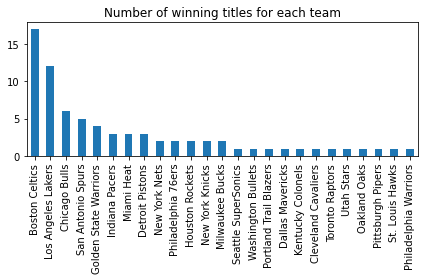

In [115]:
team_count.plot.bar()
plt.title("Number of winning titles for each team")
plt.tight_layout()
plt.show()

## Who are the top 5 assist leader all-time?

In [26]:
top_assist = adjusted_columns["Assist Leader"].value_counts().nlargest(5)
top_assist

J. Stockton      9
O. Robertson     6
S. Nash          6
B. Cousy         5
K. Porter        4
Name: Assist Leader, dtype: int64

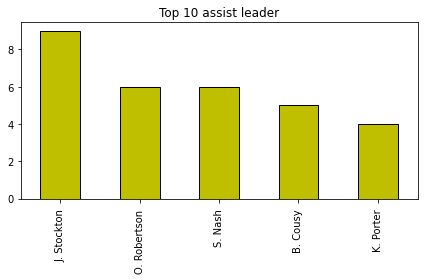

In [116]:
top_assist.plot(kind="bar",color="y",edgecolor="k")
plt.title("Top 10 assist leader")
plt.tight_layout()
plt.show()

In [40]:
Mvp_list= adjusted_columns["MVP"].unique() # list of all MVP winners
Mvp_list

array(['N. Jokić', 'G. Antetokounmpo', 'J. Harden', 'R. Westbrook',
       'S. Curry', 'K. Durant', 'L. James', 'D. Rose', 'K. Bryant',
       'D. Nowitzki', 'S. Nash', 'K. Garnett', 'T. Duncan', 'A. Iverson',
       "S. O'Neal", 'K. Malone', 'M. Jordan', 'D. Robinson',
       'H. Olajuwon', 'C. Barkley', 'M. Johnson', 'L. Bird', 'M. Malone',
       'J. Erving', 'K. Abdul-Jabbar', 'B. Walton', 'B. McAdoo',
       'J. Erving, G. McGinnis', 'D. Cowens', 'B. Cunningham',
       'A. Gilmore', 'M. Daniels', 'W. Reed', 'S. Haywood', 'W. Unseld',
       'W. Chamberlain', 'C. Hawkins', 'B. Russell', 'O. Robertson',
       'B. Pettit', 'B. Cousy'], dtype=object)

## Who are the top 10 who won the most number of MVPs?

In [117]:
mvp_count=adjusted_columns["MVP"].value_counts().nlargest(10)
mvp_count

K. Abdul-Jabbar    6
M. Jordan          5
B. Russell         5
W. Chamberlain     4
L. James           4
M. Johnson         3
L. Bird            3
M. Malone          3
J. Erving          3
S. Nash            2
Name: MVP, dtype: int64

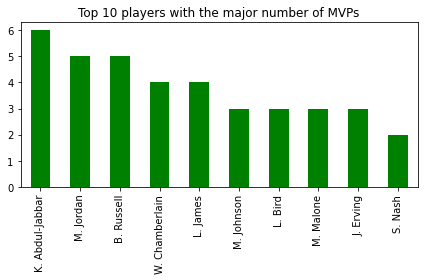

In [104]:
mvp_count.nlargest(10).plot(kind = "bar", color="green")
plt.title("Top 10 players with the major number of MVPs")
plt.tight_layout()
plt.show()

## Who are the top 10 best scorers all-time?

In [78]:
top_scorers= adjusted_columns["Best Scorer"].value_counts().nlargest(10)
top_scorers

M. Jordan           11
W. Chamberlain       7
K. Durant            5
J. Harden            4
K. Bryant            4
G. Gervin            4
S. O'Neal            3
D. Issel             3
B. McAdoo            3
K. Abdul-Jabbar      3
Name: Best Scorer, dtype: int64

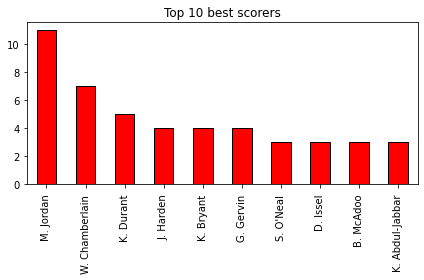

In [105]:
top_scorers.plot(kind="bar",color="red",edgecolor="k")
plt.title("Top 10 best scorers")
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'TOP 10 BEST SCORERS DISTRIBUTION'}, xlabel='Frequency', ylabel='Count'>

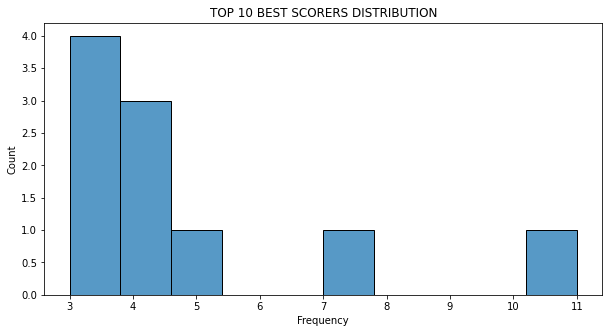

In [100]:
plt.figure(figsize = (10,5))
plt.title("TOP 10 BEST SCORERS DISTRIBUTION")
plt.xlabel("Frequency")
plt.ylabel("Count")
sns.histplot(top_scorers,x = top_scorers,bins= 10) # Let's see what kind of distibution



## Who are the top 5 best rebounders all-time?

In [118]:
top_rebounder= adjusted_columns["Best Rebounder"].value_counts().nlargest(5)
top_rebounder

W. Chamberlain     11
D. Howard           6
A. Gilmore          5
M. Malone           5
B. Russell          4
Name: Best Rebounder, dtype: int64

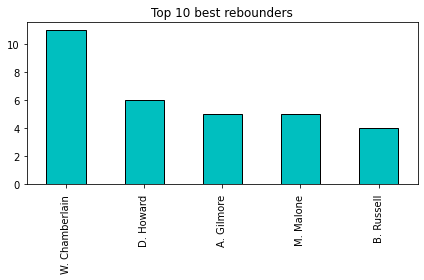

In [119]:
top_rebounder.plot(kind="bar",color="c",edgecolor="k")
plt.title("Top 5 best rebounders")
plt.tight_layout()
plt.show()